In [1]:
import pickle
import numpy as np
import lzma

import pickle
from scipy import signal
import matplotlib.pyplot as plt

In [2]:
def add_gaussian_kernel(input_vector, kernel_size, sigma):

    # Define the Gaussian kernel
    kernel = scipy.signal.gaussian(kernel_size, sigma)
    
    # Initialize the result vector with zeros as floating-point numbers
    result_vector = np.zeros(len(input_vector), dtype=float)
    
    # Iterate through the input vector
    for i, value in enumerate(input_vector):
        if value == 1.0:
            # Add the Gaussian kernel to the result vector centered around the current index
            start_idx = max(0, i - (kernel_size // 2))
            end_idx = min(len(input_vector), i + (kernel_size // 2) + 1)
            result_vector[start_idx:end_idx] += kernel[
                (kernel_size // 2) - (i - start_idx) : (kernel_size // 2) + (end_idx - i)
            ]
    
    return result_vector

# Example usage:
# input_vector = [0, 1, 0, 0, 1, 0, 0, 0, 1, 0,0,0,0]
sigma_my = 1.0 / 0.025
kernel_size_my = int(sigma_my) * 5 * 2 + 1
# result = add_gaussian_kernel(input_vector, kernel_size, sigma)
# print(result)

def FiletoVec(name):
    with lzma.open("./savedoutput/" + name + ".xz", "rb") as fp:
        outsaved = pickle.load(fp)
    vec_space = 0.025
    spike_mat = np.zeros((len(outsaved), int(10000/vec_space)))
    for i in range(len(outsaved)):
        for n in range(len(outsaved[i])):
            j = int(outsaved[i][n]/vec_space)
            spike_mat[i, j] = 1
    return spike_mat

def FiletoVec_param(NetworkType, n, model_id, input_idx, MeanDelay, stdDelay, n_run):
    CellType = "point"
    name = str(NetworkType) + '_' + str(CellType) + '_layercount' + str(n) + '_model' + str(model_id) + '_input' + str(input_idx) + '_stddelay' + str(stdDelay) + '_meandelay' + str(MeanDelay) + '_nrun' + str(n_run)
    return FiletoVec(name)

def VecbyParm(NetworkType, n, model_id, input_idx, MeanDelay, stdDelay):
    vec_lst = []
    for n_run in np.arange(0, 10, 1):
        vec_lst.append(FiletoVec_param(NetworkType, n, model_id, input_idx, MeanDelay, stdDelay, n_run))
    return np.stack(vec_lst)



def VecbyParm_withGaussian(NetworkType, n, model_id, input_idx, MeanDelay, stdDelay):
    noguas = VecbyParm(NetworkType, n, model_id, input_idx, MeanDelay, stdDelay)
    result_3d = np.apply_along_axis(add_gaussian_kernel, axis=2, arr=noguas, kernel_size = kernel_size_my, sigma = sigma_my)
    return result_3d



In [7]:
vec_lst = VecbyParm_withGaussian('ScaleFree', 30, 0, 0, 2.8, 0.1)
# with open('data_spkden.pkl', 'wb') as file:
#     pickle.dump(vec_lst, file)
# del vec_lst
# with open('data_spkden.pkl', 'rb') as file:
#     vec_lst = pickle.load(file)


In [8]:
vec_lst.shape

(10, 30, 400000)

In [9]:
vec_lst[0][15].sum()

40406.8260922389

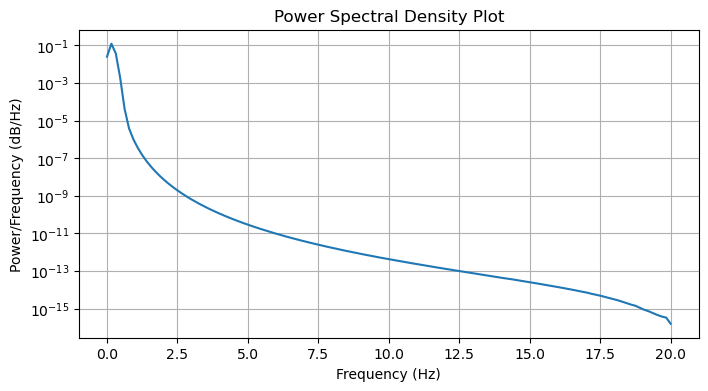

In [11]:

# Compute the PSD using Welch's method
frequencies, psd = signal.welch(vec_lst[0][15], fs=1/0.025)

# Plot the PSD
plt.figure(figsize=(8, 4))
plt.semilogy(frequencies, psd)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('Power Spectral Density Plot')
plt.grid()
plt.show()

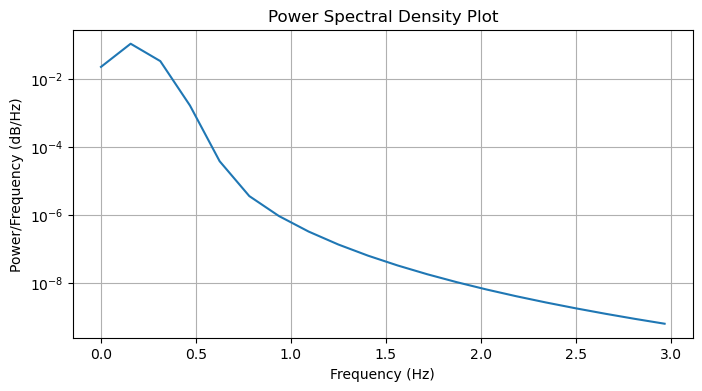

In [5]:
cutoff = 20
plt.figure(figsize=(8, 4))
plt.semilogy(frequencies[:cutoff], psd[:cutoff])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('Power Spectral Density Plot')
plt.grid()
plt.show()

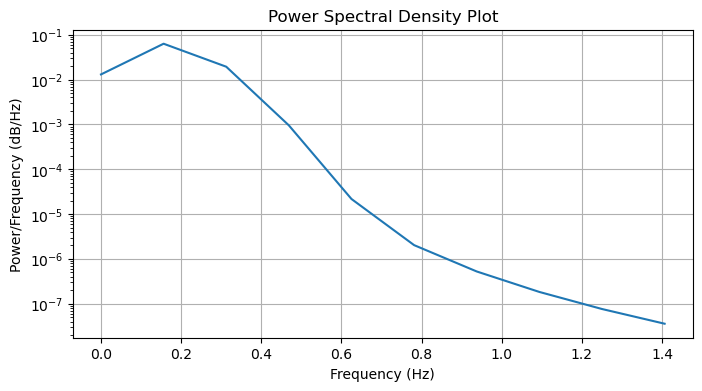

In [9]:
cutoff = 10
plt.figure(figsize=(8, 4))
plt.semilogy(frequencies[:cutoff], psd[:cutoff])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('Power Spectral Density Plot')
plt.grid()
plt.show()

In [3]:
vec_lst_1 = VecbyParm_withGaussian('FeedForward', 30, 0, 0, 2.8, 0.6)
# with open('data_spkden_1.pkl', 'wb') as file:
#     pickle.dump(vec_lst_1, file)
# del vec_lst_1
# with open('data_spkden_1.pkl', 'rb') as file:
#     vec_lst_1 = pickle.load(file)

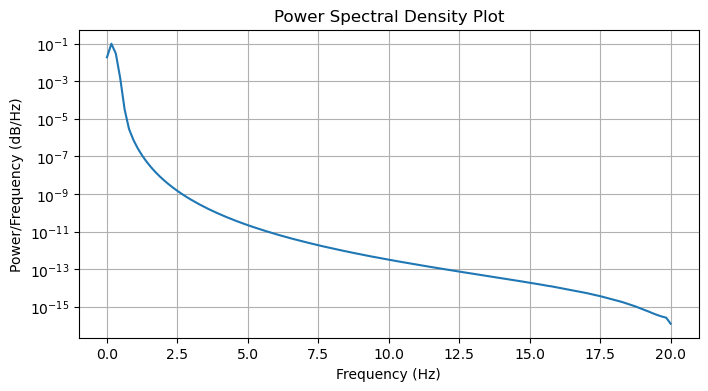

In [4]:


# Compute the PSD using Welch's method
frequencies_1, psd_1 = signal.welch(vec_lst_1[0][283], fs=1/0.025)

# Plot the PSD
plt.figure(figsize=(8, 4))
plt.semilogy(frequencies_1, psd_1)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('Power Spectral Density Plot')
plt.grid()
plt.show()

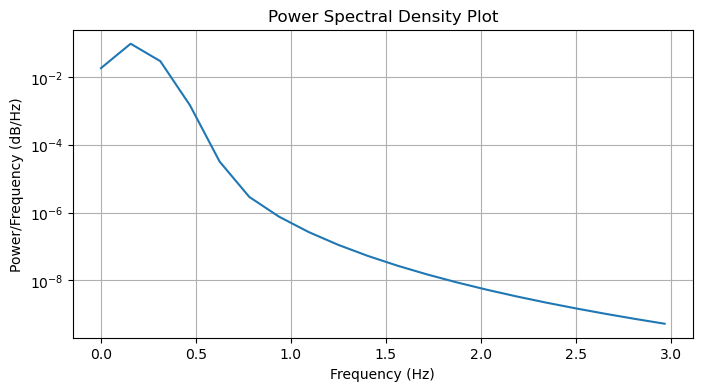

In [5]:
cutoff = 20
plt.figure(figsize=(8, 4))
plt.semilogy(frequencies_1[:cutoff], psd_1[:cutoff])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('Power Spectral Density Plot')
plt.grid()
plt.show()

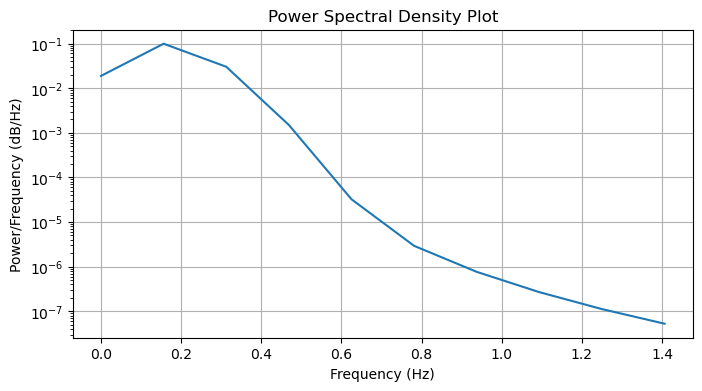

In [6]:
cutoff = 10
plt.figure(figsize=(8, 4))
plt.semilogy(frequencies_1[:cutoff], psd_1[:cutoff])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('Power Spectral Density Plot')
plt.grid()
plt.show()